float32
float32
X_train shape(100, 2)
Y_train shape(100, 1)
[ 0.97407675]


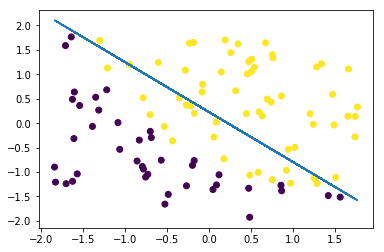

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('data1.txt', delimiter=',')
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
X1_train = ((data[:, 0] - mean[0]) / std[0]).reshape(100, 1)
X2_train = ((data[:, 1] - mean[1]) / std[1]).reshape(100, 1)
X_train = np.c_[X1_train, X2_train]
Y_train = ((data[:, 2] - mean[2]) / std[2]).reshape(100, 1)
X_train = X_train.astype('float32')
Y_train = Y_train.astype('float32')
print(X_train.dtype)
print(Y_train.dtype)
print('X_train shape' + str(X_train.shape))
print('Y_train shape' + str(Y_train.shape))
 # 前面都是对数据进行处理
 # 开始tensorflow

w = tf.Variable(np.zeros((2, 1)), dtype=tf.float32, name='w')
b = tf.Variable(0, name='w', dtype=tf.float32)

X = tf.placeholder(dtype=tf.float32, shape=[100, 2])
Y = tf.placeholder(dtype=tf.float32, shape=[100, 1])

Y_pred = tf.matmul(X_train, w) + b
Y_pred = tf.sigmoid(Y_pred)

entroy = tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_train, logits=Y_pred)
loss = tf.reduce_mean(entroy, axis=0)

optimer = tf.train.GradientDescentOptimizer(100).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(loss))
    for i in range(100):
        _, l = sess.run([optimer, loss], feed_dict={X: X_train, Y: Y_train})
        # print(l)
    plt.scatter(X1_train, X2_train, c=Y_train)
    ww = w.eval()
    x2 = (-b.eval()-ww[0]*X1_train) / ww[1]
    plt.plot(X1_train, x2)
    plt.show()
    # print(w.eval())
    # print(b.eval())